# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [5]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city','country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [6]:
# 2: how to get the first 5 rows of the "city" column?

df['city'][0:5]


0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [7]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat                 51.4782
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [8]:
# Q4: how to use .loc to select the first row in "country" column?
df.loc[0,'country']

'United Kingdom'

In [9]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df.loc[0:4,['city','date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24
4,Hounslow,05/14/2014 11:38


### Using .iloc[ ]

In [10]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.head()
df.iloc[2,1]

-0.44608100000000006

In [11]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [12]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [13]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df_series = df['city'] == 'Munich'
df_series


0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [14]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 

df_spainnotbarcelona = df.loc[(df['country'] == 'Spain') & (df['city'] != 'Barcelona')]
df_spainnotbarcelona

,lat,lon,date,city,country
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain


In [15]:
# Q11: select rows where either the city is munich, or the country is serbia
df.loc[(df['country'] == 'Serbia') | (df['city'] == 'Munich')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [16]:
# Q12: how many observations are west of the prime meridian?
df.loc[df['lon'] <0]


,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal
5,38.723108,-9.113374,05/15/2014 11:34,Lisbon,Portugal
6,38.691944,-9.215561,05/15/2014 14:50,Lisbon,Portugal
7,38.708487,-9.136022,05/15/2014 16:49,Lisbon,Portugal
8,38.797558,-9.341000,05/16/2014 10:58,Algueirão-Mem Martins,Portugal
9,38.801171,-9.425103,05/16/2014 13:43,Sintra,Portugal


In [17]:
# Q13: get all rows that contain a city that starts with the letter G
df.loc[df['city'].str.startswith('C')]

,lat,lon,date,city,country
20,40.210869,-8.481383,05/17/2014 12:58,Coimbra Municipality,Portugal
53,50.034048,19.612510,05/31/2014 13:25,Chrzanów County,Poland


In [18]:
# Q14: how many unique cities and countries in the dataset? 
unique_country = df['country'].nunique()
unique_city = df['city'].nunique()
print("There are", unique_country, "unique countries and",unique_city, "unique cities")
# Also can you check missing values for the dataframe
df.isna().sum()

There are 15 unique countries and 91 unique cities


lat        0
lon        0
date       0
city       0
country    0
dtype: int64

In [37]:
# Q15: group by country name and show the city names in each of the country
pd.set_option('display.max_colwidth', None)
df.groupby('country')['city'].unique()
#for key, item in df_group:
#    print(df_group.get_group(key))

country
Albania                                                                                                                                                                                                                                                                                        [Berat, Gjirokastër]
Bosnia and Herzegovina                                                                                                                                                                                                                                                                           [Sarajevo, Mostar]
Croatia                                                                                                                                                                                                                                                                                   [Ploče, Split, Dubrovnik]
Czech Republic                                                      

## Part 3 <br /> How to select based on a date-time values

In [22]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [33]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [40]:
# Q17: drop duplicate index 
dt = dt[~dt.index.duplicated(keep='first')]
dt.index.is_unique

True

In [54]:
# Q18: create a weekday and a weekend dataframe = 12 May is Monday
dt.reset_index(drop=True, inplace=True)
dt['weekday'] = dt['date'].dt.dayofweek
dt_wd = dt.loc[dt['weekday'] <6]
dt_we = dt.loc[dt['weekday'] >5]
print(dt_wd)

      level_0  index                date        lat        lon          city  \
0           0      0 2014-05-14 09:07:00  51.481292  -0.451011  West Drayton   
1           1      1 2014-05-14 09:22:00  51.474005  -0.450999      Hounslow   
2           2      2 2014-05-14 10:51:00  51.478199  -0.446081      Hounslow   
3           3      3 2014-05-14 11:24:00  51.478199  -0.446081      Hounslow   
4           4      4 2014-05-14 11:38:00  51.474146  -0.451562      Hounslow   
...       ...    ...                 ...        ...        ...           ...   
1753     1753   1753 2014-07-09 13:13:00  48.356013  11.791710        Munich   
1754     1754   1754 2014-07-09 13:14:00  48.356528  11.792183        Munich   
1755     1755   1755 2014-07-09 13:17:00  48.356285  11.791710        Munich   
1756     1756   1756 2014-07-09 13:18:00  48.355328  11.791710        Munich   
1757     1757   1757 2014-07-09 13:20:00  48.357110  11.791346        Munich   

             country  weekday  
0     U

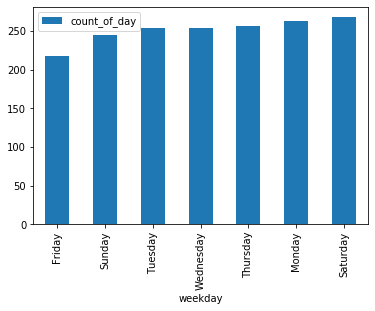

In [102]:
# Q19: calculate and plot the number of observations each day of the week has
dt['weekday'] = dt['date'].dt.day_name()
dt_plot = dt.groupby('weekday').count()
dt_plot.rename(columns=({'level_0' : 'count_of_day'}),inplace=True)
dt_plot = dt_plot.drop(columns=['index', 'date','lat','lon','city','country','weekday_no'])
dt_plot = dt_plot.sort_values(by = ['count_of_day'])
dt_plot.plot.bar()